### A. Consider the Life Expectancy data :
1. Do any of the values look different from the rest? Fit a regression line of Life Expectancy on GDP and see if there are any influential points.
2. Study Standardized and Studentized Residuals and comment.
3. Obtain the DFBETAs and DFFITs. Also Calculate Cook’s distance and comment.

In [380]:
import pandas as pd
life_data = pd.read_excel('MS-ASA Sem 2 MSA 494 Regression - 1.xlsm')
life_data

,Country,Year,Status,Life.expectancy,GDP
0,Afghanistan,2015,Developing,65.0,584.259210
1,Albania,2015,Developing,77.8,3954.227830
2,Algeria,2015,Developing,75.6,4132.762920
3,Angola,2015,Developing,52.4,3695.793748
4,Antigua and Barbuda,2015,Developing,76.4,13566.954100
...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,Developing,74.1,NaN
179,Viet Nam,2015,Developing,76.0,NaN
180,Yemen,2015,Developing,65.7,NaN
181,Zambia,2015,Developing,61.8,1313.889646


In [381]:
life_data.isna().sum()

Country             0
Year                0
Status              0
Life.expectancy     0
GDP                29
dtype: int64

In [382]:
life_data=life_data.dropna()
life_data=life_data.reset_index(drop=True)
life_data.isna().sum()

Country            0
Year               0
Status             0
Life.expectancy    0
GDP                0
dtype: int64

In [383]:
life_data.tail()

,Country,Year,Status,Life.expectancy,GDP
149,Uruguay,2015,Developing,77.0,15524.842470
150,Uzbekistan,2015,Developing,69.4,2137.576852
151,Vanuatu,2015,Developing,72.0,285.834140
152,Zambia,2015,Developing,61.8,1313.889646
153,Zimbabwe,2015,Developing,67.0,118.693830


In [384]:
life_data.describe()

,Year,Life.expectancy,GDP
count,154.0,154.000000,154.000000
mean,2015.0,71.690260,7185.331746
std,0.0,8.280789,11697.508913
min,2015.0,51.000000,33.681223
25%,2015.0,66.125000,766.008101
50%,2015.0,73.950000,2916.228918
75%,2015.0,77.075000,7290.107448
max,2015.0,88.000000,66346.522670


In [385]:
import plotly.express as px

fig = px.scatter(life_data, x="GDP", y="Life.expectancy",
        color="Country",
                 hover_name="Country", log_x=True, size_max=60)
fig.show()

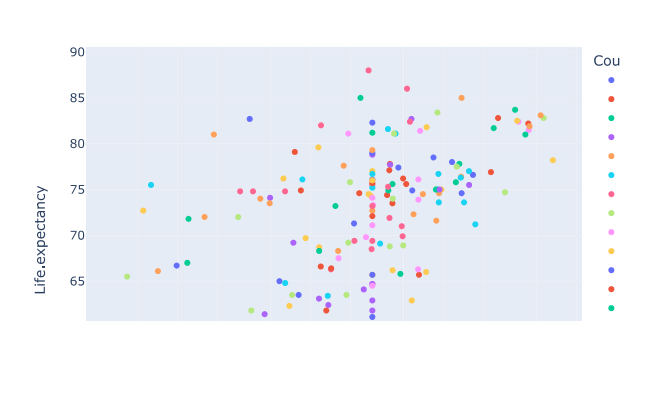

In [386]:
life_df = pd.DataFrame(life_data['GDP'])
life_df['Life_Exp'] = life_data['Life.expectancy']

In [387]:
life_df

,GDP,Life_Exp
0,584.259210,65.0
1,3954.227830,77.8
2,4132.762920,75.6
3,3695.793748,52.4
4,13566.954100,76.4
...,...,...
149,15524.842470,77.0
150,2137.576852,69.4
151,285.834140,72.0
152,1313.889646,61.8


<AxesSubplot:>

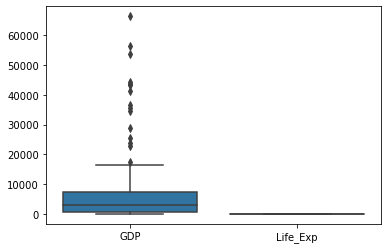

In [388]:
import seaborn as sns
sns.boxplot(data=life_df)

<AxesSubplot:xlabel='GDP', ylabel='Life_Exp'>

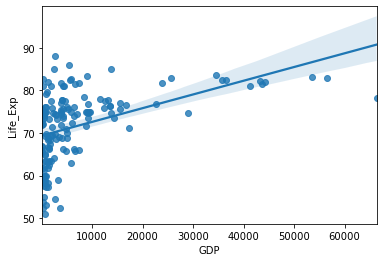

In [389]:
sns.regplot(x="GDP", y="Life_Exp", data=life_df)

It is visible that there are some influential observations, affecting the regression line.

In [390]:
import statsmodels.api as sm

x_val = sm.add_constant(life_df['GDP'])
y_val = life_df['Life_Exp']
model = sm.OLS(y_val,x_val).fit()

In [391]:
influence = model.get_influence()

#### Standardized Residuals :

In [392]:
stand_resid = influence.resid_studentized_internal
stand_resid

array([-0.61971987,  0.96947318,  0.66333784, -2.46368843,  0.36049712,
        0.35127484,  0.71967703, -0.68885575, -0.27009358,  0.44843593,
        0.03022352,  0.32339105,  0.15154846,  0.13658857,  1.39931617,
        0.00828551, -1.30691676, -0.05688244,  0.88807152, -0.78363685,
        0.38015842,  0.95531449,  0.38928419, -1.31320559, -1.32876616,
        0.4029626 , -0.14283904, -1.69318929, -0.15611432, -2.30599529,
       -2.24298239,  1.52381326,  0.8741625 ,  0.70761171, -0.82951113,
        1.33690137,  0.66404535,  1.28597374,  2.01533059,  2.02173244,
       -0.87876352,  0.33084586,  0.89843546,  0.37882436, -1.57551835,
        1.03790327, -0.64952209, -0.14399602,  1.40420126,  0.17577601,
       -0.78031028,  0.51670741, -0.22691938, -1.00625727,  1.56918557,
        0.17051197,  0.17074961, -1.43270488, -1.44810732, -0.6114735 ,
       -0.83328296,  0.60676462,  0.33141565,  1.55595039, -0.21673222,
       -0.18333291, -0.28186548,  1.33908812,  0.22488634,  1.79

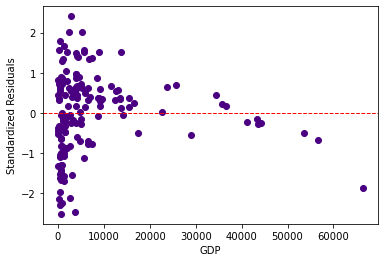

In [393]:
plt.scatter(life_data['GDP'], stand_resid , color = 'indigo')
plt.xlabel('GDP')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

In [394]:
np.where(abs(np.array(stand_resid))>2)

(array([  3,  29,  30,  38,  39,  79, 103, 123, 125], dtype=int64),)

#### Studentized Residuals :

In [396]:
student_resid = influence.resid_studentized_external
student_resid

array([-0.61845977,  0.96928023,  0.66211126, -2.50611855,  0.35946302,
        0.35025963,  0.718531  , -0.68766026, -0.26926828,  0.44725433,
        0.03012403,  0.32243645,  0.15106053,  0.13614688,  1.4037767 ,
        0.00825822, -1.30999161, -0.05669562,  0.88745073, -0.78263739,
        0.37908609,  0.95503822,  0.3881951 , -1.3163674 , -1.33214766,
        0.40184958, -0.14237796, -1.70375424, -0.15561241, -2.33968778,
       -2.27353385,  1.53052789,  0.87348064,  0.70644473, -0.82865572,
        1.34040032,  0.66281951,  1.28876651,  2.03607724,  2.04272343,
       -0.87810149,  0.32987455,  0.8978624 ,  0.37775454, -1.58330861,
        1.03816883, -0.64828227, -0.14353136,  1.40874165,  0.17521465,
       -0.77930167,  0.5154578 , -0.22621002, -1.0062991 ,  1.57683951,
        0.1699664 ,  0.17020333, -1.43772494, -1.45339641, -0.61020973,
       -0.83244092,  0.60549913,  0.33044308,  1.56332358, -0.2160515 ,
       -0.18274905, -0.28101021,  1.34261895,  0.22418266,  1.80

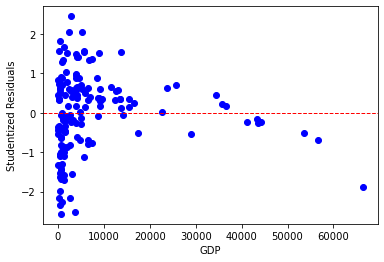

In [397]:
plt.scatter(life_data['GDP'], student_resid , color = 'blue')
plt.xlabel('GDP')
plt.ylabel('Studentized Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

In [398]:
np.where(abs(np.array(student_resid))>3)

(array([], dtype=int64),)

#### High Leverage value detection :

In [402]:
leverage = influence.hat_matrix_diag
leverage

array([0.00857488, 0.00699219, 0.0069386 , 0.00707515, 0.00843879,
       0.00837841, 0.00871242, 0.12291454, 0.07006261, 0.00892181,
       0.01797462, 0.00887717, 0.00984187, 0.0065665 , 0.00687565,
       0.00675401, 0.00845086, 0.00749184, 0.00681898, 0.00651385,
       0.00661154, 0.00698798, 0.00649526, 0.00855517, 0.00893657,
       0.00734867, 0.00822581, 0.00817939, 0.06884798, 0.00872629,
       0.00845496, 0.00849175, 0.00839907, 0.00853705, 0.00848544,
       0.0082355 , 0.00741588, 0.00846415, 0.00759873, 0.00666066,
       0.00784702, 0.00651805, 0.00854888, 0.00694025, 0.0081215 ,
       0.00789174, 0.00853647, 0.00673822, 0.00690636, 0.04761649,
       0.00649549, 0.00705242, 0.06168393, 0.00811381, 0.00883241,
       0.00668974, 0.0070017 , 0.0085937 , 0.00856694, 0.00693746,
       0.00843219, 0.00762134, 0.00777534, 0.00659406, 0.00797659,
       0.00720122, 0.00672703, 0.00650648, 0.0454117 , 0.00872579,
       0.00672878, 0.04206408, 0.00863028, 0.00885104, 0.00812

In [406]:
HVi = 3*(1/153)
leverage_list = np.where((np.array(cooks))>HVi)
leverage_list

(array([  3,   7,  29,  30,  79, 113, 123, 125], dtype=int64),)

In [427]:
for i in leverage_list:
    print(life_data['GDP'][i])

3       3695.793748
7      56554.387600
29       348.381417
30       777.248751
79       173.828930
113    66346.522670
123      587.538233
125     2729.863830
Name: GDP, dtype: float64


So, these are the High Leverage values.

#### Influential observation detection :

#### Using DFBETAS :

In [401]:
dfbetas = influence.dfbetas
dfbetas

array([[-5.74772727e-02,  2.83371978e-02],
       [ 7.81237263e-02, -2.17212517e-02],
       [ 5.29344291e-02, -1.40174587e-02],
       [-2.04357687e-01,  6.06557884e-02],
       [ 1.64113190e-02,  1.59215905e-02],
       [ 1.61179726e-02,  1.52707911e-02],
       [ 6.73437147e-02, -3.39950413e-02],
       [ 8.10693731e-02, -2.50535167e-01],
       [ 1.77800448e-02, -7.04014154e-02],
       [ 4.24350297e-02, -2.21387000e-02],
       [ 3.76524016e-04,  3.25719414e-03],
       [ 3.05144237e-02, -1.58125771e-02],
       [ 5.80567483e-03,  8.78446089e-03],
       [ 9.98299731e-03, -1.16706006e-03],
       [ 1.11080812e-01, -2.75363679e-02],
       [ 6.38616253e-04, -1.33741997e-04],
       [-1.20785417e-01,  5.82031061e-02],
       [-4.84743229e-03,  1.79812483e-03],
       [ 6.95177150e-02, -1.60653500e-02],
       [-5.57241390e-02,  3.54194150e-03],
       [ 2.39244258e-02,  4.13211616e-03],
       [ 7.69281658e-02, -2.13115189e-02],
       [ 2.69886420e-02, -5.16413645e-04],
       [-1.

In [423]:
DBi = (2/(153**(1/2)))
dfbeta_list = np.where(abs(np.array(cooks))>CDi)
dfbeta_list

(array([  7, 113, 123], dtype=int64),)

In [425]:
for i in dfbeta_list:
    print(life_data['GDP'][i],life_data['Life.expectancy'][i])

7      56554.387600
113    66346.522670
123      587.538233
Name: GDP, dtype: float64 7      82.8
113    78.2
123    51.0
Name: Life.expectancy, dtype: float64


#### Using DFFITS :

In [412]:
(dffits, p) = influence.dffits
dffits

array([-5.75169196e-02,  8.13353961e-02,  5.53450640e-02, -2.11549147e-01,
        3.31615382e-02,  3.21957000e-02,  6.73620045e-02, -2.57427299e-01,
       -7.39097106e-02,  4.24352816e-02,  4.07550581e-03,  3.05152972e-02,
        1.50604369e-02,  1.10689244e-02,  1.16802715e-01,  6.80987006e-04,
       -1.20937748e-01, -4.92579887e-03,  7.35342832e-02, -6.33721894e-02,
        3.09264064e-02,  8.01160048e-02,  3.13879898e-02, -1.22280499e-01,
       -1.26498979e-01,  3.45755946e-02, -1.29665867e-02, -1.54721528e-01,
       -4.23135578e-02, -2.19520932e-01, -2.09942799e-01,  1.41641851e-01,
        8.03896831e-02,  6.55532027e-02, -7.66587709e-02,  1.22144895e-01,
        5.72918784e-02,  1.19072536e-01,  1.78164512e-01,  1.67270555e-01,
       -7.80922045e-02,  2.67194655e-02,  8.33736421e-02,  3.15798115e-02,
       -1.43269741e-01,  9.25923170e-02, -6.01540436e-02, -1.18219064e-02,
        1.17479176e-01,  3.91780829e-02, -6.30124784e-02,  4.34409338e-02,
       -5.79993714e-02, -

In [460]:
DFi = (2*((1/153)**(1/2)))
dffit_list = np.where(abs(np.array(dffits))>DFi)
dffit_list

(array([  3,   7,  29,  30,  38,  39,  69,  79, 103, 113, 123, 124, 125,
        127], dtype=int64),)

In [461]:
for i in dffit_list:
    print(life_data['GDP'][i],life_data['Life.expectancy'][i])

3       3695.793748
7      56554.387600
29       348.381417
30       777.248751
38      2375.112700
39      5314.644160
69       349.147550
79       173.828930
103     2655.157977
113    66346.522670
123      587.538233
124    53629.737460
125     2729.863830
127      426.985370
Name: GDP, dtype: float64 3      52.4
7      82.8
29     52.5
30     53.1
38     85.0
39     86.0
69     82.7
79     53.7
103    54.5
113    78.2
123    51.0
124    83.1
125    88.0
127    55.0
Name: Life.expectancy, dtype: float64


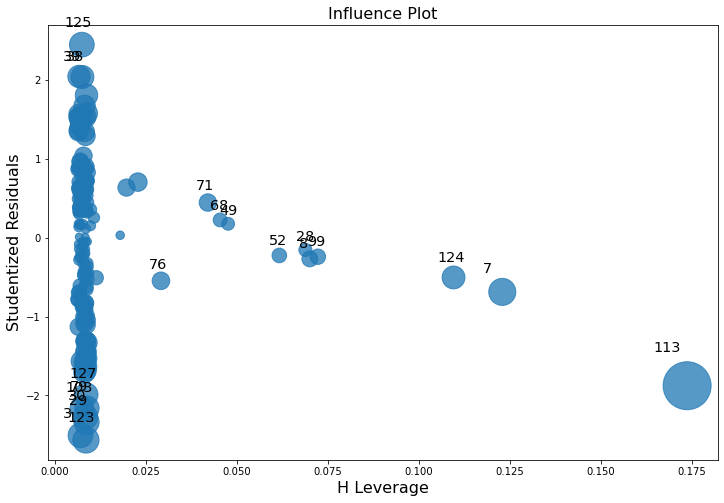

In [462]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = 0.05, ax = ax, criterion="dffit")

#### Using Cook's Distance :

In [408]:
(cooks, p) = influence.cooks_distance
cooks

array([1.66084529e-03, 3.30904032e-03, 1.53721776e-03, 2.16252386e-02,
       5.53011933e-04, 5.21290347e-04, 2.27606300e-03, 3.32497145e-02,
       2.74809135e-03, 9.05140243e-04, 8.35982273e-06, 4.68352603e-04,
       1.14142179e-04, 6.16586742e-05, 6.77815553e-03, 2.33407120e-07,
       7.27867933e-03, 1.22118300e-05, 2.70742924e-03, 2.01314912e-03,
       4.80930634e-04, 3.21114412e-03, 4.95370851e-04, 7.44038855e-03,
       7.96042812e-03, 6.01051606e-04, 8.46115561e-05, 1.18213922e-02,
       9.01002698e-04, 2.34057681e-02, 2.14496817e-02, 9.94338363e-03,
       3.23629731e-03, 2.15571564e-03, 2.94435300e-03, 7.42079334e-03,
       1.64725576e-03, 7.05844322e-03, 1.55495027e-02, 1.37036803e-02,
       3.05379573e-03, 3.59070162e-04, 3.48002011e-03, 5.01470613e-04,
       1.01623638e-02, 4.28447576e-03, 1.81618142e-03, 7.03319136e-05,
       6.85626818e-03, 7.72386579e-04, 1.99042845e-03, 9.48137764e-04,
       1.69252881e-03, 4.14143819e-03, 1.09711178e-02, 9.79047928e-05,
      

In [409]:
CDi = (4/153)
cooks_list = np.where(abs(np.array(cooks))>CDi)
cooks_list

(array([  7, 113, 123], dtype=int64),)

In [410]:
for i in cooks_list:
    print(life_data['GDP'][i],life_data['Life.expectancy'][i])

7      56554.387600
113    66346.522670
123      587.538233
Name: GDP, dtype: float64 7      82.8
113    78.2
123    51.0
Name: Life.expectancy, dtype: float64


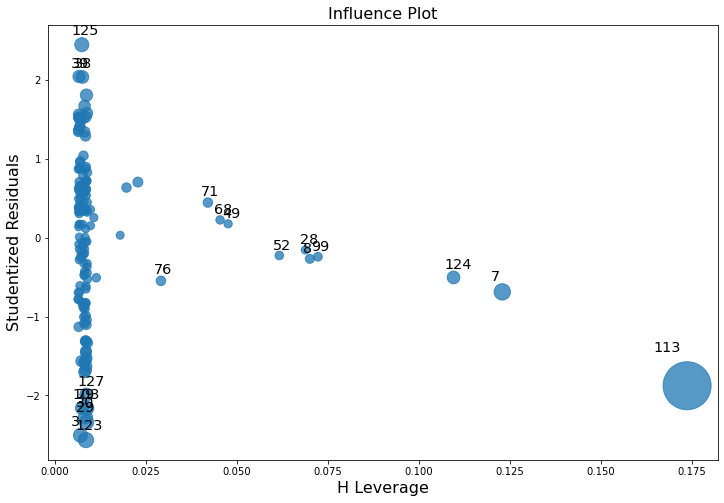

In [411]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = 0.05, ax = ax, criterion="cooks")

So, the 7th, 113th and 123rd values are the most common influential observations.

### B. Consider the following data on cloud seeding by silver iodide crystal. Each case represents a different day. Consider Y as the dependent variable and others as independent variable.
1. Check for any outliers in the data.
2. Discuss the influence of these outliers on regression.


In [135]:
cloud_data = pd.read_excel('MS-ASA Sem 2 MSA 494 Regression - 1 2.xlsm')
cloud_data

,A,T,S,C,P,E,Y
0,0,0,1.75,13.4,0.274,0,2.55
1,1,3,4.10,3.9,0.198,0,1.83
2,0,4,2.35,5.3,0.526,1,1.80
3,1,6,4.25,7.1,0.250,1,0.89
4,0,9,1.60,6.9,0.018,0,1.28
5,0,25,3.35,4.9,0.194,1,1.51
6,0,27,2.85,12.1,0.751,1,1.84
7,1,28,2.20,5.2,0.084,1,1.62
8,1,29,4.40,4.1,0.236,1,1.01
9,1,32,3.10,2.8,0.214,1,1.39


In [195]:
cloud_data.describe()

,A,T,S,C,P,E,Y
count,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,0.500000,34.55000,3.185500,6.035000,0.25740,0.750000,1.335000
std,0.512989,23.56285,0.845636,3.215796,0.20966,0.444262,0.725676
min,0.000000,0.00000,1.600000,2.200000,0.01800,0.000000,-0.190000
25%,0.000000,21.00000,2.725000,3.700000,0.13300,0.750000,0.980000
50%,0.500000,32.50000,3.250000,5.250000,0.20600,1.000000,1.500000
75%,1.000000,53.75000,3.962500,7.025000,0.25600,1.000000,1.755000
max,1.000000,82.00000,4.400000,13.400000,0.79600,1.000000,2.550000


<AxesSubplot:>

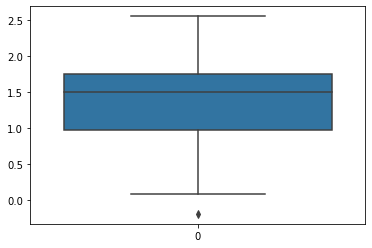

In [207]:
sns.boxplot(data=cloud_data.Y)

From the boxplot, it is clearly visible that a value of Y which is lesser than zero(i.e. negative) is exhibiting an outlierish characteristic. The observation is -0.19.

In [436]:
Y=pd.DataFrame(cloud_data['Y'])
X=pd.DataFrame(cloud_data['A'])
X['T']=cloud_data['T']
X['S']=cloud_data['S']
X['C']=cloud_data['C']
X['P']=cloud_data['P']
X['E']=cloud_data['E']

In [484]:
model_1 = sm.OLS(Y[0:15],X[0:15]).fit()

In [485]:
pred_Y = model_1.predict(X[15:20])
pred_Y

15    0.772459
16    2.323572
17    1.614280
18    0.904737
19    2.587334
dtype: float64

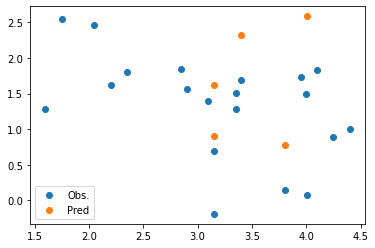

In [486]:
plt.scatter(X['S'],Y)
plt.scatter(X['S'][15:20],pred_Y)
plt.legend(['Obs.','Pred'])

So, this is how the regression is getting affected by the outlier.

# Submitted by,
### Soumitro Mukherjee
#### Reg. No. : 213001818010030  ,  Roll No. : 30018021030
### M.Sc. in Applied Statistics and Analytics